In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def optimize_memory(df1):
    for col in df1.columns:
        col_type = df1[col].dtypes
        if col_type == 'int64':
            df1[col] = df1[col].astype('int32')
        elif col_type == 'float64':
            df1[col] = df1[col].astype('float32')
        elif col_type == 'object':  # For string-based data
            df1[col] = df1[col].astype('category')
    return df1

chunks = []
test_dataset = r"C:\Users\preethavenkat02\Downloads\GUIDE_Test.csv.zip"
# Read the dataset in chunks and process each chunk
for chunk in pd.read_csv(test_dataset, chunksize=500000,low_memory=False):
    chunk = optimize_memory(chunk)
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df1 = pd.concat(chunks, ignore_index=True)

# Clean up memory
del chunks
df1.head()


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,3390,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,3658,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1715,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,5148,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,5019,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype   
---  ------              -----   
 0   Id                  int32   
 1   OrgId               int32   
 2   IncidentId          int32   
 3   AlertId             int32   
 4   Timestamp           object  
 5   DetectorId          int32   
 6   AlertTitle          int32   
 7   Category            object  
 8   MitreTechniques     object  
 9   IncidentGrade       category
 10  ActionGrouped       category
 11  ActionGranular      object  
 12  EntityType          object  
 13  EvidenceRole        category
 14  DeviceId            int32   
 15  Sha256              int32   
 16  IpAddress           int32   
 17  Url                 int32   
 18  AccountSid          int32   
 19  AccountUpn          int32   
 20  AccountObjectId     int32   
 21  AccountName         int32   
 22  DeviceName          int32   
 23  NetworkMessageId    int32   
 24

In [3]:
df1.shape

(4147992, 46)

In [4]:
df1.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'Usage'],
      dtype='object')

In [5]:
df1.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [6]:
# Calculate the percentage of missing values for each column
missing_percentage = df1.isnull().sum() / len(df1) * 100

# List columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
print("Columns with more than 50% missing values are dropped:")
print(columns_to_drop)

# Drop these columns
df1.drop(columns=columns_to_drop, axis=1, inplace=True)


Columns with more than 50% missing values are dropped:
Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')


In [7]:
# Impute missing values for numeric columns
numeric_columns = df1.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).columns
for col in numeric_columns:
    if df1[col].isnull().any():
        median_val = df1[col].median()
        df1[col] = df1[col].fillna(median_val)
        print(f"Imputed numeric column '{col}' with median value: {median_val}")


In [8]:
# Impute missing values for categorical columns
categorical_columns = df1.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df1[col].isnull().any():
        mode_val = df1[col].mode()[0]
        df1[col] = df1[col].fillna(mode_val)
        print(f"Imputed categorical column '{col}' with mode value: {mode_val}")


In [9]:
df1.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

In [10]:
# Check for missing values in the 'Year' column
#missing_values = df1['Year'].isna().sum()
#print(f"Missing values in 'Year' column: {missing_values}")


In [120]:
# Check if there are any unique values in 'Month', 'DayOfWeek', and 'Hour'
#print(df1[['Month', 'DayOfWeek', 'Hour']].nunique())


In [121]:
##df1['Month'] = df1['Month'].fillna(1)  # Default value 1 for Month (January)
#df1['DayOfWeek'] = df1['DayOfWeek'].fillna(0)  # Default value 0 for DayOfWeek (Monday)
#df1['Hour'] = df1['Hour'].fillna(0)  # Default value 0 for Hour


In [11]:
df1.dtypes


Id                       int32
OrgId                    int32
IncidentId               int32
AlertId                  int32
Timestamp               object
DetectorId               int32
AlertTitle               int32
Category                object
IncidentGrade         category
EntityType              object
EvidenceRole          category
DeviceId                 int32
Sha256                   int32
IpAddress                int32
Url                      int32
AccountSid               int32
AccountUpn               int32
AccountObjectId          int32
AccountName              int32
DeviceName               int32
NetworkMessageId         int32
RegistryKey              int32
RegistryValueName        int32
RegistryValueData        int32
ApplicationId            int32
ApplicationName          int32
OAuthApplicationId       int32
FileName                 int32
FolderPath               int32
ResourceIdName           int32
OSFamily                 int32
OSVersion                int32
CountryC

In [12]:
# Target variable distribution
print("Target variable distribution:")
df1['IncidentGrade'].value_counts()

Target variable distribution:


IncidentGrade
BenignPositive    1752940
TruePositive      1492354
FalsePositive      902698
Name: count, dtype: int64

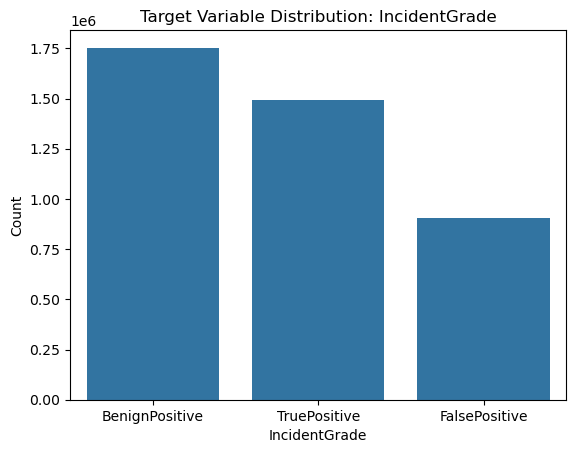

In [13]:
sns.countplot(data=df1, x='IncidentGrade', order=df1['IncidentGrade'].value_counts().index)
plt.title('Target Variable Distribution: IncidentGrade')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()


In [14]:
print(df1.columns)  # Check all column names


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Usage'],
      dtype='object')


In [15]:
 #If the timestamp is in a specific format like 'DD-MM-YYYY HH:MM:SS'
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')


In [16]:
df1['Timestamp'] = df1['Timestamp'].fillna(pd.Timestamp('2000-01-01'))


In [17]:
print(df1['Timestamp'].head(10))


0   2000-01-01
1   2000-01-01
2   2000-01-01
3   2000-01-01
4   2000-01-01
5   2000-01-01
6   2000-01-01
7   2000-01-01
8   2000-01-01
9   2000-01-01
Name: Timestamp, dtype: datetime64[ns]


In [18]:
df1['Year'] = df1['Timestamp'].dt.year
df1['Month'] = df1['Timestamp'].dt.month
df1['DayOfWeek'] = df1['Timestamp'].dt.dayofweek
df1['Hour'] = df1['Timestamp'].dt.hour


In [19]:
# Drop the 'Timestamp' and 'Usage'column
df1.drop(columns=['Timestamp','Usage'], inplace=True)


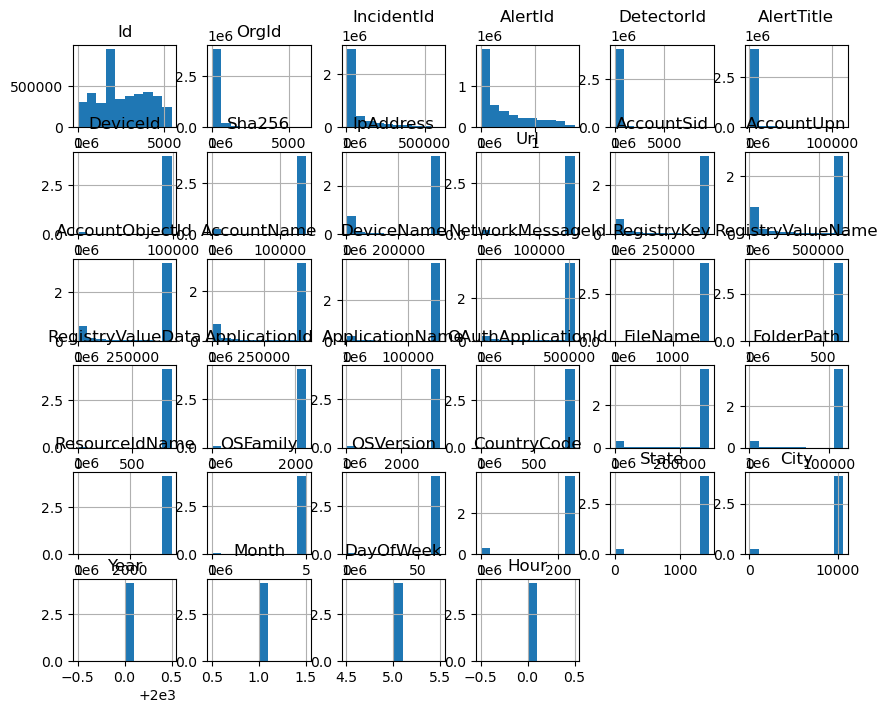

In [20]:
df1.hist(figsize=(10,8))
plt.show()

In [21]:
# List of numeric columns in DataFrame
numeric_columns = df1.select_dtypes(include=['int8','int16', 'int32', 'int64', 'float64'])

In [22]:
print(categorical_columns)


Index(['Timestamp', 'Category', 'EntityType'], dtype='object')


In [23]:
print(df1.dtypes)


Id                       int32
OrgId                    int32
IncidentId               int32
AlertId                  int32
DetectorId               int32
AlertTitle               int32
Category                object
IncidentGrade         category
EntityType              object
EvidenceRole          category
DeviceId                 int32
Sha256                   int32
IpAddress                int32
Url                      int32
AccountSid               int32
AccountUpn               int32
AccountObjectId          int32
AccountName              int32
DeviceName               int32
NetworkMessageId         int32
RegistryKey              int32
RegistryValueName        int32
RegistryValueData        int32
ApplicationId            int32
ApplicationName          int32
OAuthApplicationId       int32
FileName                 int32
FolderPath               int32
ResourceIdName           int32
OSFamily                 int32
OSVersion                int32
CountryCode              int32
State   

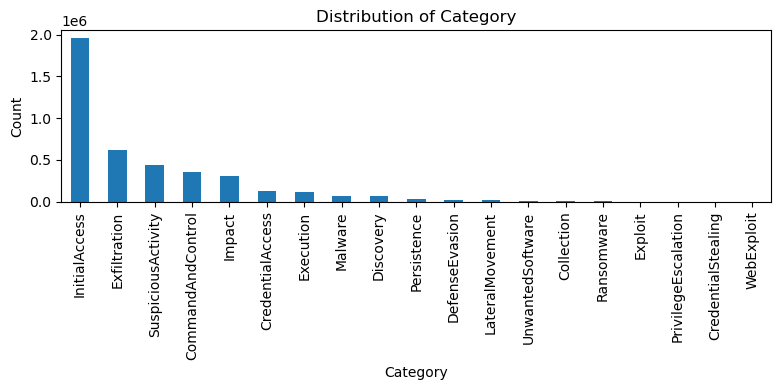

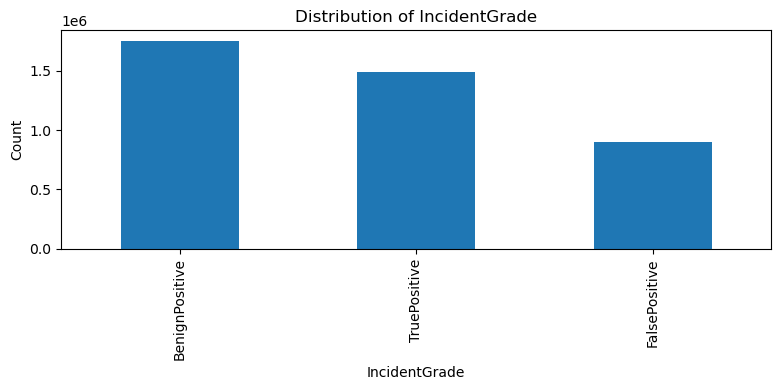

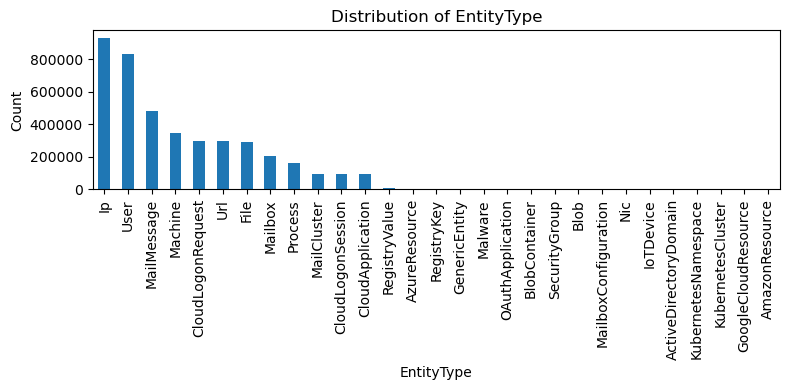

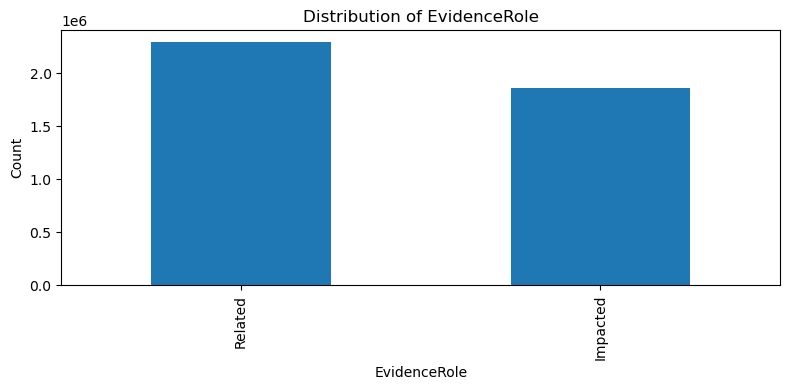

In [24]:
# Get categorical columns
categorical_columns = df1.select_dtypes(include=['object', 'category']).columns

# Loop through each categorical column and plot its distribution
for col in categorical_columns:
    plt.figure(figsize=(8, 4))  # Adjust the figure size
    df1[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')  # Optional label for the y-axis
    plt.tight_layout()  # Adjust layout to prevent cutting off labels
    plt.show()


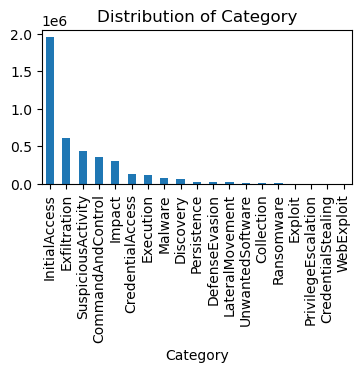

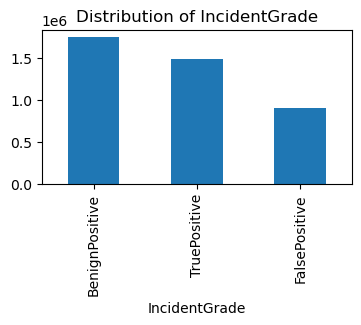

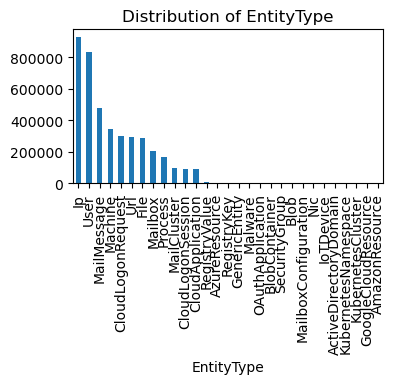

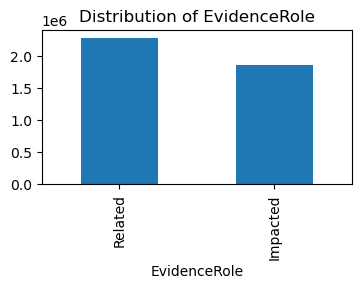

In [25]:
# Bar plot for categorical data
# List of categorical columns in DataFrame
categorical_columns = df1.select_dtypes(include=['object','category'])

for col in categorical_columns:
    plt.figure(figsize=(4, 2))
    df1[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

In [26]:
# Check for missing values in numeric columns
numeric_cols = ['OrgId', 'IncidentId', 'AlertId', 'DeviceId', 'IpAddress', 'Year', 'Month', 'DayOfWeek']

df1[numeric_cols].isnull().sum()


OrgId         0
IncidentId    0
AlertId       0
DeviceId      0
IpAddress     0
Year          0
Month         0
DayOfWeek     0
dtype: int64

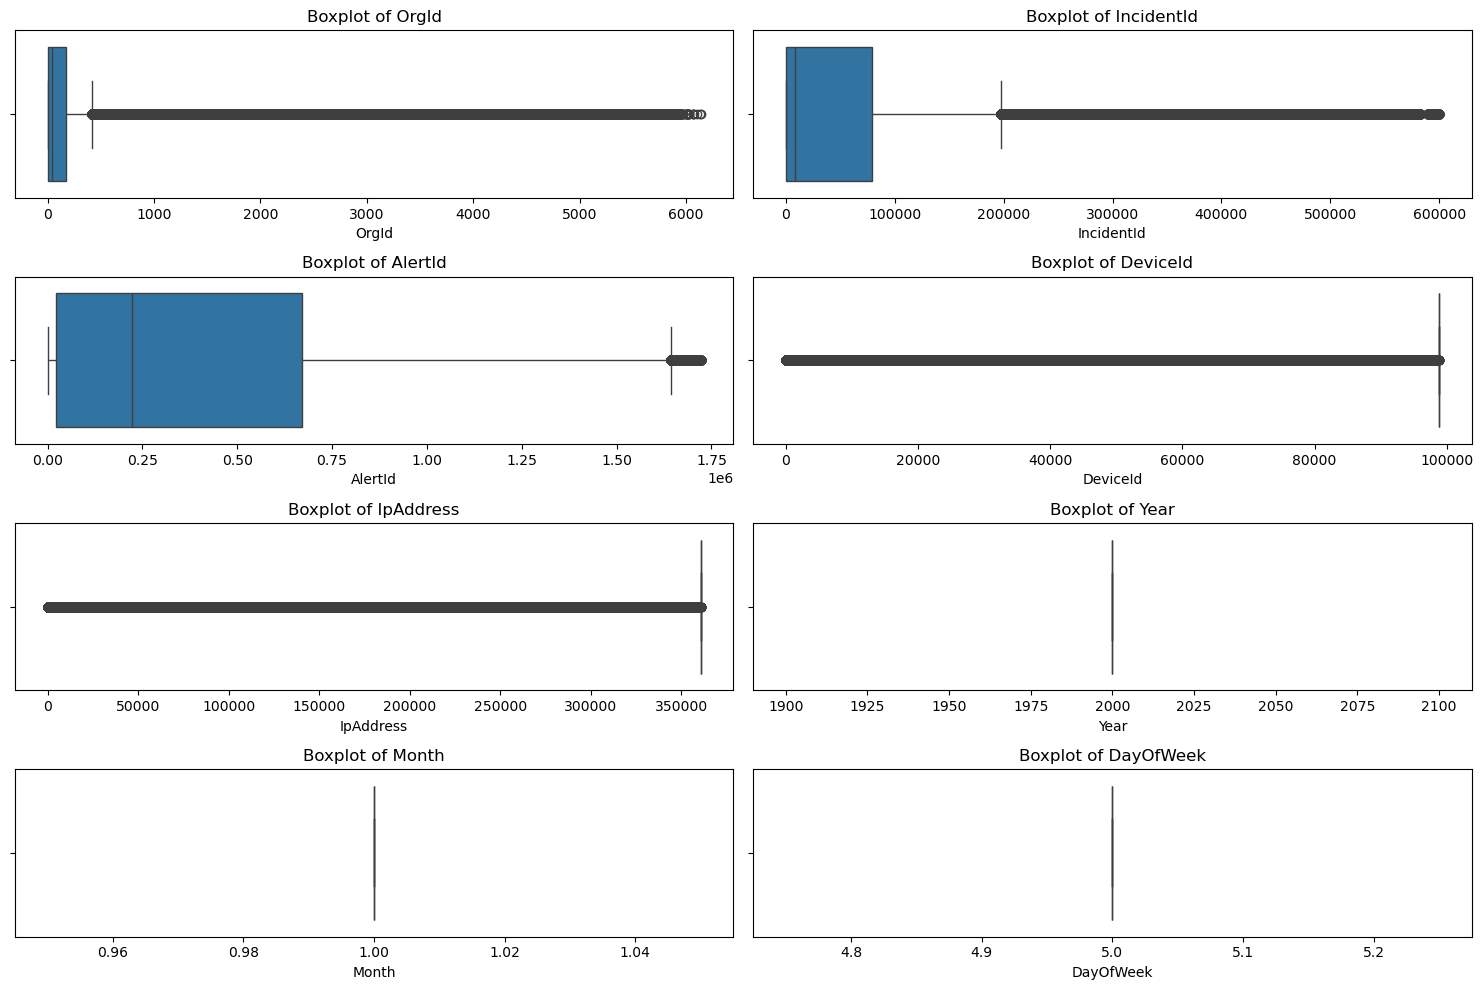

In [27]:
# Ploting box plots for numerical columns
numeric_cols = ['OrgId', 'IncidentId', 'AlertId', 'DeviceId', 'IpAddress', 'Year', 'Month', 'DayOfWeek']
plt.figure(figsize=(15, 10))
num_plots = len(numeric_cols)
rows = (num_plots + 1) // 2

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 2, i)
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [28]:
# Handling Outliers
def outliers(df1, iqr_multiplier=1.5):
    numeric_features = df1.select_dtypes(include=['int32', 'int16', 'float32', 'int64', 'float64'])
    for col in numeric_features.columns:
        Q1 = numeric_features[col].quantile(0.25)
        Q3 = numeric_features[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
            
        df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
    return df1

# Usage
df1 = outliers(df1, iqr_multiplier=1.5)  # Adjusting the IQR multiplier if necessary


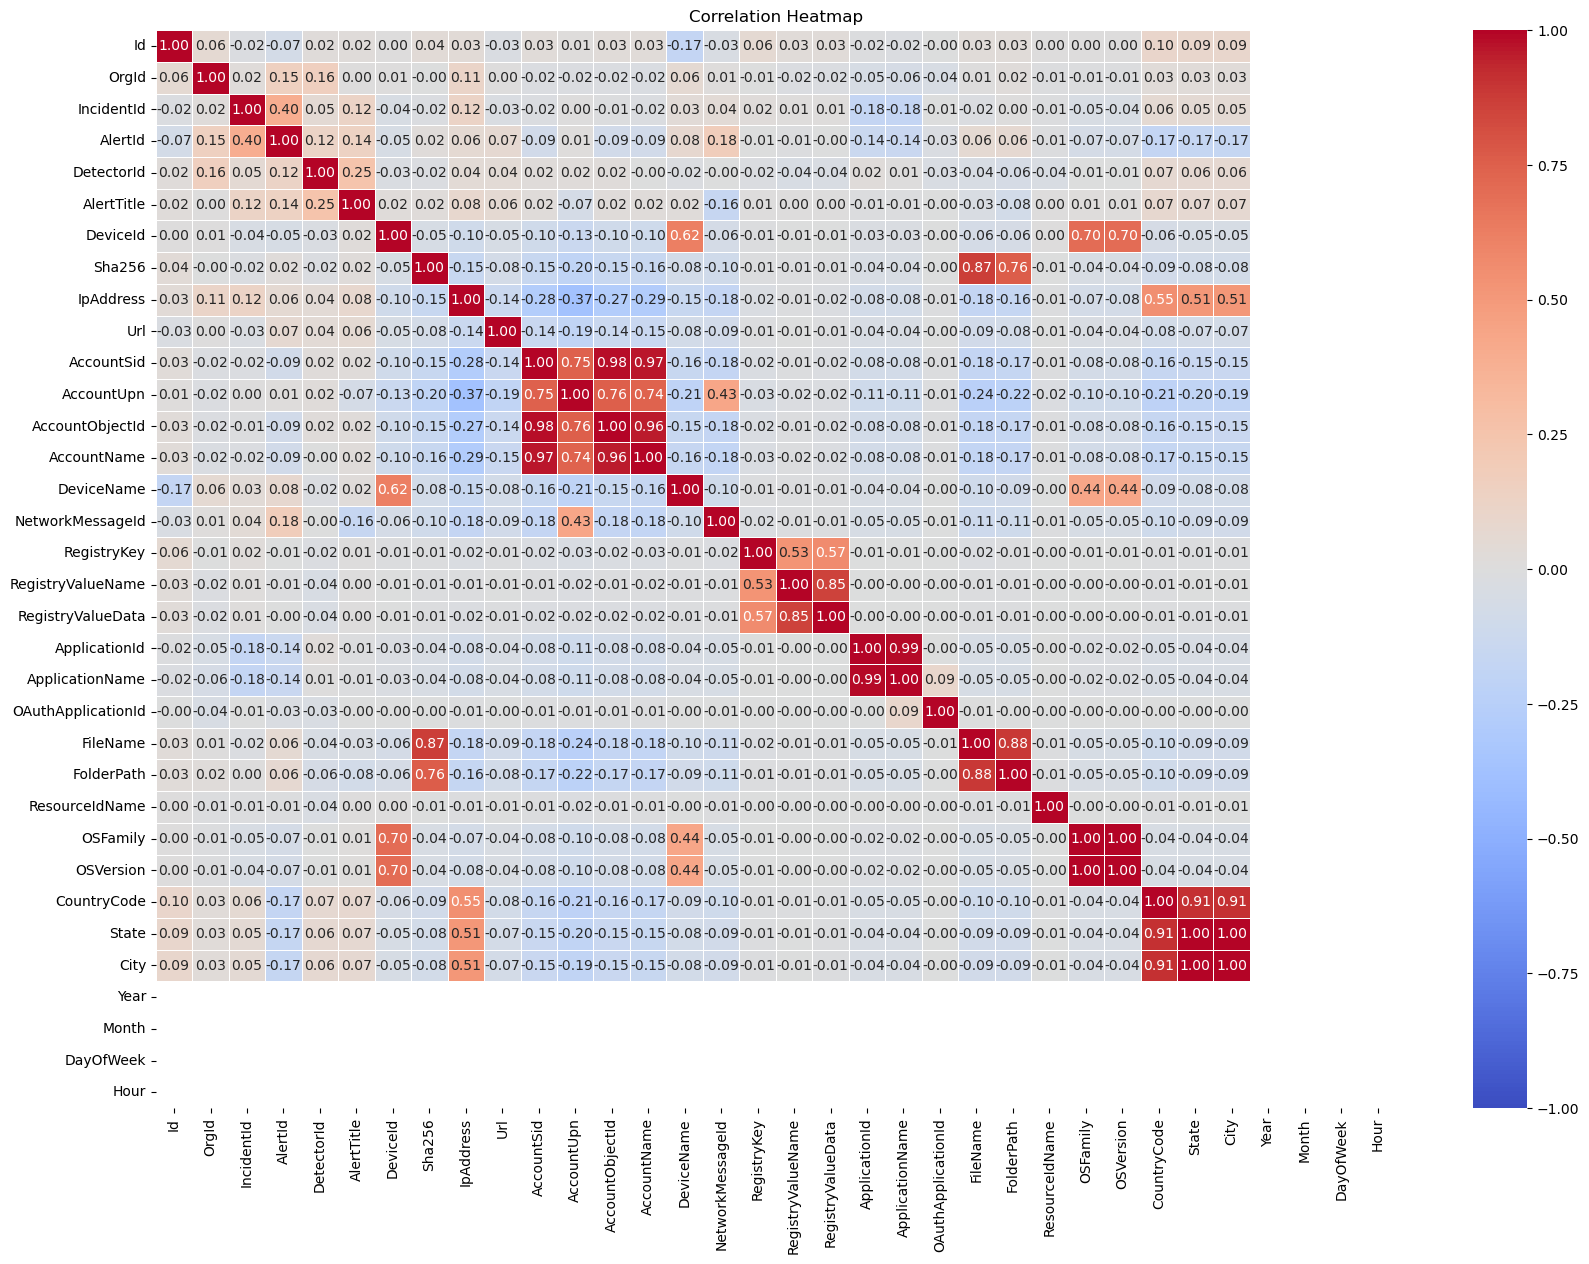

In [29]:
# heatmap visualization
plt.figure(figsize=(20, 14))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

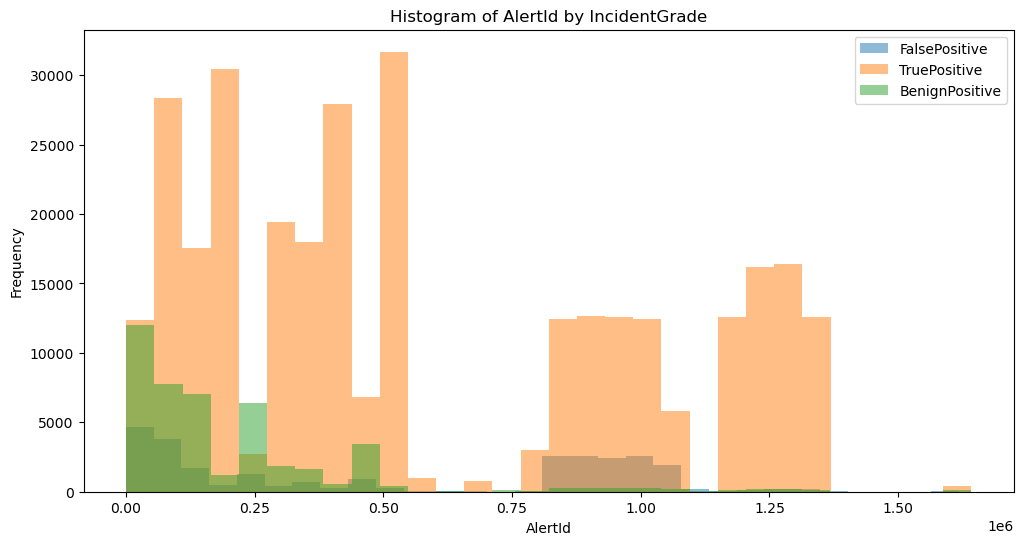

In [30]:
plt.figure(figsize=(12, 6))
for grade in df1['IncidentGrade'].unique():
    subset = df1[df1['IncidentGrade'] == grade]
    plt.hist(subset['AlertId'], bins=30, alpha=0.5, label=grade)

plt.xlabel('AlertId')
plt.ylabel('Frequency')
plt.title('Histogram of AlertId by IncidentGrade')
plt.legend()
plt.show()

In [31]:
id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 
              'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 
              'DeviceName', 'NetworkMessageId',  'RegistryKey', 'RegistryValueName', 
              'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
              'FileName', 'FolderPath', 'ResourceIdName','OSFamily','OSVersion', 'City','CountryCode', 'State']


In [32]:
# Exclude ID columns from scaling
numeric_features = df1.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).drop(columns=id_columns, errors='ignore')


In [33]:
# Scaling numerical features 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1[numeric_features.columns] = scaler.fit_transform(numeric_features)


In [34]:
# categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

for col in categorical_columns:
    if col in df1.columns:
        df1[col] = label_encoder.fit_transform(df1[col].astype(str))  # Convert to string if necessary


In [35]:
# Remove duplicate rows
df1.drop_duplicates(inplace=True)


In [36]:
print(type(df1))  # It should return <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


In [37]:
# Save the process
path = r"C:\users\preethavenkat02\Downloads\test_dataset.csv"
df1.to_csv(path, index=False)
print("Data preprocessing complete and saved .")

Data preprocessing complete and saved .


In [38]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [40]:
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [41]:
df=pd.read_csv(r'C:\Users\preethavenkat02\Downloads\train_dataset.csv')
df1=pd.read_csv(r'C:\Users\preethavenkat02\Downloads\test_dataset.csv')

In [42]:
# Separateing features (X) and target variable (y)
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']

# Spliting the data (80:20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
#Machine Learning Models
X_train_subsample = X_train.sample(frac=0.1, random_state=42)
y_train_subsample = y_train.loc[X_train_subsample.index]

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(n_jobs=-1, random_state=42),
    'LightGBM': LGBMClassifier(n_jobs=-1, random_state=42),
}

for model_name, model in models.items():
    print(f'Model: {model_name}')
    
    model.fit(X_train_subsample, y_train_subsample)
    
    y_pred = model.predict(X_val)
    
    # Evaluateing the models
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    
    # Displaying the results of the modles
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(report)
    print('Confusion Matrix:')
    print(cm)
    print('-' * 50)

Model: Logistic Regression
Accuracy: 0.5810831900866614
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.75      0.65    775107
           1       0.54      0.14      0.23    390976
           2       0.60      0.65      0.62    628025

    accuracy                           0.58   1794108
   macro avg       0.57      0.51      0.50   1794108
weighted avg       0.58      0.58      0.55   1794108

Confusion Matrix:
[[581845  36263 156999]
 [223502  55531 111943]
 [212680  10195 405150]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.9651643044900307
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    775107
           1       0.96      0.94      0.95    390976
           2       0.98      0.96      0.97    628025

    accuracy                           0.97   1794108
   macro avg       0.97      0.96      0.96   1794108

In [44]:
# Creating a report data
report = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting'],
    'Accuracy': [0.5811, 0.9685, 0.9652, 0.9309, 0.9096, 0.8171],
    'Macro-F1 Score': [0.50, 0.97, 0.96, 0.93, 0.90, 0.80],
    'Precision': [0.57, 0.97, 0.96, 0.93, 0.91, 0.84],
    'Recall': [0.51, 0.97, 0.94, 0.92, 0.89, 0.78]
}


df = pd.DataFrame(report)

print("Comparison Table:")
print(df.to_string(index=False))

best_models_with_max_f1 = df[df['Macro-F1 Score'] == df['Macro-F1 Score'].max()]

if len(best_models_with_max_f1) > 1:
    best_model = best_models_with_max_f1.loc[best_models_with_max_f1['Accuracy'].idxmax()]
else:
    best_model = df.loc[df['Macro-F1 Score'].idxmax()]

print("\nBest Model Based on Macro-F1 Score (and Accuracy in case of a tie):")
print(best_model)

Comparison Table:
              Model  Accuracy  Macro-F1 Score  Precision  Recall
Logistic Regression    0.5811            0.50       0.57    0.51
      Decision Tree    0.9685            0.97       0.97    0.97
      Random Forest    0.9652            0.96       0.96    0.94
            XGBoost    0.9309            0.93       0.93    0.92
           LightGBM    0.9096            0.90       0.91    0.89
  Gradient Boosting    0.8171            0.80       0.84    0.78

Best Model Based on Macro-F1 Score (and Accuracy in case of a tie):
Model             Decision Tree
Accuracy                 0.9685
Macro-F1 Score             0.97
Precision                  0.97
Recall                     0.97
Name: 1, dtype: object


In [45]:
pip install --upgrade joblib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Applying SMOTE to the training data for class imbalance and doing hyperparameter tuning for best result


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Function to load and process the data
def load_and_process_data(file_path):
    # Loading the data (encoded or raw)
    df = pd.read_csv(file_path)

    # Separating the features (X) and target variable (y)
    X = df.drop('IncidentGrade', axis=1)
    y = df['IncidentGrade']

    # Converting all columns in X to numeric, and drop any columns with NaN values
    X = X.apply(pd.to_numeric, errors='coerce')
    X = X.dropna(axis=1)  # Dropping columns with NaN values

    return X, y

# Function to downsample data for quicker processing
def downsample_data(X, y, train_size=0.02):
    # Downsampling the training data to a smaller size (e.g., 2%) for quicker processing
    X_train_sampled, _, y_train_sampled, _ = train_test_split(X, y, train_size=train_size, stratify=y, random_state=42)
    
    # Converting boolean columns to integers if present
    if X_train_sampled.select_dtypes(include=['bool']).shape[1] > 0:
        X_train_sampled = X_train_sampled.astype(int)
        
    return X_train_sampled, y_train_sampled

# Function to handle class imbalance using SMOTE
def apply_smote(X_train_sampled, y_train_sampled):
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sampled, y_train_sampled)
    return X_train_resampled, y_train_resampled

# Function for model training with RandomizedSearchCV
def train_model(X_train_resampled, y_train_resampled):
    # Hyperparameters for RandomizedSearchCV (customized for Decision Tree)
    param_dist = {
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'criterion': ['gini', 'entropy']
    }

    # Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=42)

    # Randomized Search CV for hyperparameter tuning
    random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=5,
                                       cv=3, verbose=1, random_state=42, n_jobs=-1)

    # Fitting the Randomized Search with resampled training data
    random_search.fit(X_train_resampled, y_train_resampled)

    # Best model from RandomizedSearchCV
    best_dt = random_search.best_estimator_
    
    return best_dt, random_search

# Function to evaluate the model on validation data
def evaluate_model(best_dt, X_val, y_val):
    y_pred = best_dt.predict(X_val)
    
    # Printing the best hyperparameters
    print("Best Hyperparameters:", random_search.best_params_)

    # Printing classification report
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    # Printing confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

# Function to save the model and processed data
def save_model_and_data(best_dt, X_train_resampled, y_train_resampled, model_path, data_path):
    # Saving the tuned Decision Tree model using joblib
    joblib.dump(best_dt, model_path)
    print(f"Model saved as {model_path}")

    # Saving the resampled training data or processed data to CSV format
    processed_data = pd.DataFrame(X_train_resampled)
    processed_data['IncidentGrade'] = y_train_resampled
    processed_data.to_csv(data_path, index=False)
    print(f"Processed training data saved as {data_path}")

# Main execution flow
def main():
    # Load and process data
    X, y = load_and_process_data(r'C:\Users\preethavenkat02\Downloads\train_dataset.csv')

    # Splitting the data into training and validation sets (80:20)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Downsampling the training data to 2% for quicker processing
    X_train_sampled, y_train_sampled = downsample_data(X_train, y_train)

    # Applying SMOTE for handling class imbalance in multi-class classification
    X_train_resampled, y_train_resampled = apply_smote(X_train_sampled, y_train_sampled)

    # Train model
    best_dt, random_search = train_model(X_train_resampled, y_train_resampled)

    # Evaluate the model on validation data
    evaluate_model(best_dt, X_val, y_val)

    # Save model and processed data
    save_model_and_data(best_dt, X_train_resampled, y_train_resampled,
                        r"C:\Users\preethavenkat02\Downloads\dt_smote_tuned_model.joblib",
                        r"C:\Users\preethavenkat02\Downloads\processed_train_data.csv")

# Run the main function
if __name__ == "__main__":
    main()


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94    775107
           1       0.87      0.91      0.89    390976
           2       0.94      0.94      0.94    628025

    accuracy                           0.93   1794108
   macro avg       0.92      0.93      0.92   1794108
weighted avg       0.93      0.93      0.93   1794108

Confusion Matrix:
[[718010  32588  24509]
 [ 19656 356620  14700]
 [ 18567  19605 589853]]
Model saved as C:\Users\preethavenkat02\Downloads\dt_smote_tuned_model.joblib
Processed training data saved as C:\Users\preethavenkat02\Downloads\processed_train_data.csv


In [58]:
print("Training Data Columns:", X_train.columns)
print("Test Data Columns:", df1.columns)


Training Data Columns: Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256',
       'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
       'AccountName', 'DeviceName', 'NetworkMessageId', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath',
       'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State',
       'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')
Test Data Columns: Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'A

In [ ]:
#Evaluation of Best Random Forest Model on Test Data


In [59]:
# Rename the 'DayOfWeek' column in the test data to 'Day' to match the training data
df1.rename(columns={'DayOfWeek': 'Day'}, inplace=True)

# Now, ensure the columns in the test data match the order and features in the training data
X_test = df1[X_train.columns]  # Re-order the test data columns to match the training columns

# No need to drop 'IncidentGrade' here as it's not part of X_test
# Make predictions on the test data
y_test_pred = best_dt.predict(X_test)

# Print predictions
print("Predictions on Test Data:", y_test_pred)


Predictions on Test Data: [2 1 2 ... 2 2 2]


In [61]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'y_test' is the actual target variable in the test dataset
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))



Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.33      0.13      0.19     24124
           1       0.15      0.44      0.23     21252
           2       0.94      0.86      0.90    303765

    accuracy                           0.78    349141
   macro avg       0.47      0.48      0.44    349141
weighted avg       0.85      0.78      0.81    349141

Confusion Matrix:
[[  3186  13490   7448]
 [  2107   9427   9718]
 [  4334  38557 260874]]


In [ ]:
#Applying SMOTE-ENN to the training data for class imbalance and doing hyperparameter tuning for best result

In [65]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [68]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Assuming your data is already loaded in train_data and preprocessed
X = df.drop('IncidentGrade', axis=1)
y = df['IncidentGrade']

# Convert to numeric values if necessary
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)

# Splitting the data (80:20 split for training and validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Downsampling the training data to 2% for quicker processing
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=0.02, stratify=y_train, random_state=42)

if X_train_sampled.select_dtypes(include=['bool']).shape[1] > 0:
    X_train_sampled = X_train_sampled.astype(int)

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sampled, y_train_sampled)

# Applying Edited Nearest Neighbours for undersampling
enn = EditedNearestNeighbours()
X_train_resampled, y_train_resampled = enn.fit_resample(X_train_resampled, y_train_resampled)

# Hyperparameters for RandomizedSearchCV
param_dist = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=5,
                                   cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fitting the Randomized Search with resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best model from RandomizedSearchCV
best_dt = random_search.best_estimator_

# Evaluating on validation data
y_pred = best_dt.predict(X_val)

# Print results
print("Best Hyperparameters:", random_search.best_params_)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Save predictions and the model performance to CSV
# Create a DataFrame with the predictions and actual values
results_df = pd.DataFrame({
    'True Label': y_val,
    'Predicted Label': y_pred
})

# Save the results to a CSV file
results_df.to_csv('decision_tree_predictions.csv', index=False)

print("Results saved as decision_tree_predictions.csv")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91    775107
           1       0.87      0.84      0.86    390976
           2       0.97      0.85      0.90    628025

    accuracy                           0.90   1794108
   macro avg       0.90      0.88      0.89   1794108
weighted avg       0.90      0.90      0.90   1794108

Confusion Matrix:
[[746421  19877   8809]
 [ 51352 329653   9971]
 [ 68441  27326 532258]]
Results saved as decision_tree_predictions.csv


In [83]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix

# Loading the saved Decision Tree model
best_dt = joblib.load(r"C:\Users\preethavenkat02\Downloads\dt_smote_tuned_model.joblib")

# Loading the processed test data
df1 = pd.read_csv(r"C:\Users\preethavenkat02\Downloads\test_dataset.csv")

# Renaming 'DayOfWeek' to 'Day' to match the training data
df1 = df1.rename(columns={"DayOfWeek": "Day"})

# Separating the features and target from test data
X_test = df1.drop('IncidentGrade', axis=1)
y_test = df1['IncidentGrade']

# Making predictions on the test data using the trained model
y_test_pred = best_dt.predict(X_test)

# Evaluating the saved model on the test data
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix on test data
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred))



Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.33      0.13      0.19     24124
           1       0.15      0.44      0.23     21252
           2       0.94      0.86      0.90    303765

    accuracy                           0.78    349141
   macro avg       0.47      0.48      0.44    349141
weighted avg       0.85      0.78      0.81    349141


Confusion Matrix on Test Data:
[[  3186  13490   7448]
 [  2107   9427   9718]
 [  4334  38557 260874]]


In [ ]:
#Feature Importance and Error Analysis


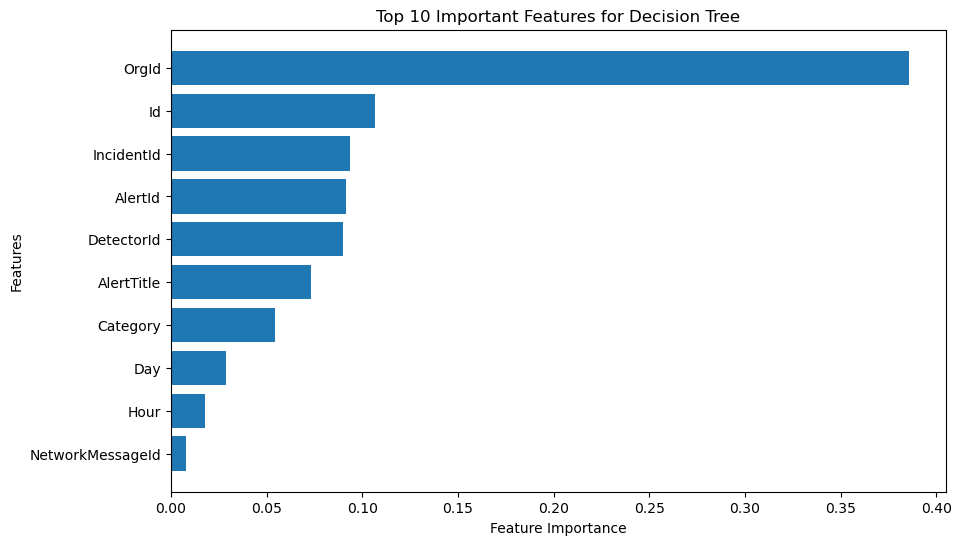

Misclassified Samples (First 5):
      Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  Category  \
0   5148    222       15294   917686           0    0.000000         5   
1   2405      5         188   938345          19    0.063559         5   
14  1844    131       35740    31468           6    0.021186         5   
20  2022     23         212   408195           4    0.012712         5   
21  1973     39         435    20106           6    0.021186         5   

    EntityType  EvidenceRole  DeviceId  ...  ResourceIdName  OSFamily  \
0            1             1     98799  ...            3586         5   
1            1             1     98799  ...            3586         5   
14           5             1     98799  ...            3586         5   
20           0             1     98799  ...            3586         5   
21           5             1     98799  ...            3586         5   

    OSVersion  CountryCode  State   City  Year  Month  Day  Hour  
0          66   

In [84]:

# Assuming you have the DecisionTree model as best_dt and test data as X_test, y_test
# Get feature importances from the best DecisionTree model (best_dt)
importances = best_dt.feature_importances_

# Extract feature names (assuming you are using X_test's columns for feature names)
features = X_test.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and select the top 10 important features
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features for Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()

# Make predictions on validation/test data
y_test_pred = best_dt.predict(X_test)

# Identify misclassified samples
misclassified_idx = (y_test != y_test_pred)

# Extract the misclassified samples
misclassified_samples = X_test[misclassified_idx].copy()

# Display the first 5 misclassified samples
print("Misclassified Samples (First 5):")
print(misclassified_samples.head(5))

# Evaluate the model's predictions
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
